### Mapa para detecção de outliers em imagens - Bart e Homer

**Importações iniciais**

In [12]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

**Leitura da base de dados**

In [2]:
dataframe = pd.read_csv('personagens.csv')

In [6]:
dataframe.shape

(293, 7)

In [9]:
features = dataframe.iloc[:, 0:6].values
classe = dataframe.iloc[:,6].values

**Normalização dos dados**

In [13]:
normalizador = MinMaxScaler(feature_range = (0,1))
features = normalizador.fit_transform(features)

**Construção do mapa auto organizável**

In [17]:
som = MiniSom(x = 9, y = 9, input_len = 6, random_seed = 0)
som.random_weights_init(features)
som.train_random(data = features, num_iteration = 100)

classe[classe == 'Bart'] = 0
classe[classe == 'Homer'] = 1

**Visualização dos dados**

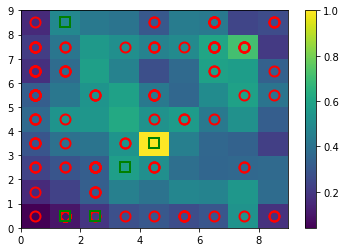

In [21]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(features):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[classe[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[classe[i]], markeredgewidth = 2)

In [24]:
mapeamento = som.win_map(features)

suspeitos = mapeamento[(4,5)]
suspeitos = normalizador.inverse_transform(suspeitos)